# [SOLUTION] Exercise 8: Diagnose Model Problems from Loss Curves

Loss curves are X-rays for neural networks. When you know how to read them, you can diagnose and fix most training problems in minutes rather than hours. But pattern recognition takes practice.

> **Overview**: Diagnose model generalization issues from loss functions via a reusable plotting utility, and consolidate your knowledge into a diagnostic cheat sheet you can use in real projects.
> 
> **Scenario**: You are consulting as the "model doctor" for three forest conservation agencies. Agency A's model can't learn patterns (predictions barely beat random guessing). Agency B's model works perfectly on training sites but fails on new regions. Agency C's training keeps spiking to infinity. Each agency has sent you their training logs, containing 100 epochs of loss values. Your job: diagnose what went wrong and prescribe the fix.
> 
> **Goal**: Build pattern recognition skills by connecting loss curve signatures to root causes within the systematic diagnostic workflow that experts use to troubleshoot models.
> 
> **Tools**: Python, PyTorch, NumPy, Matplotlib
> 
> **Estimated Time**: 20 minutes

## Step 1: Setup

Let's import our libraries and set up the environment.

In [1]:
# Import core libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Create output directory
output_dir = 'assets/_SOLUTION-exercise8'
os.makedirs(output_dir, exist_ok=True)

print("Setup complete!")
print(f"Output directory: {output_dir}")

Setup complete!
Output directory: assets/_SOLUTION-exercise8


## Step 2: Build your diagnostic tool

Before diving into diagnosing patients, let's build a tool that will serve you throughout this exercise: a reusable function to plot loss curves. This way, you can focus on pattern recognition rather than repeatedly rewriting diagnostic code.

Your function should plot both training and validation losses on the same figure, with proper labels, legend, and styling.

In [2]:
# TODO: Implement a reusable plotting function for loss curves
# Hint: Configure your plot as follows:
#   -   Create epochs for x-axis - how can you extract epochs from the `train_losses`` shape?
#   -   Plot both curves with different colors (e.g., green for training, red for validation),
#   -   Add proper labels (xlabel, ylabel) plus a legend to distinguish the curves
# Reference: https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

def plot_loss_curves(train_losses, val_losses, title):
    """
    Plot training and validation loss curves for diagnosis.
    
    Args:
        train_losses: Array of training loss values (one per epoch)
        val_losses: Array of validation loss values (one per epoch)
        title: Title for the plot
    """
    # Add your code here
    
    epochs = range(1, len(train_losses) + 1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, 'g-', linewidth=2, label='Training Loss')
    plt.plot(epochs, val_losses, 'r-', linewidth=2, label='Validation Loss')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print("✓ Plotting function defined")

✓ Plotting function defined


> **Why a reusable function?** In real projects, you will find yourself diagnosing your model dozens of times (after every training run!). Writing a clean plotting function once and reusing it saves time and ensures consistency.
> 
> It also separates the "how to plot" from the "what does it mean": letting you focus on the diagnostic patterns rather than matplotlib syntax every time.

## Step 3: Diagnose three training failures

Now comes the detective work. You'll examine three failed training runs, each with a different signature pattern in their loss curves. For each patient, you'll:
1. Load their training history (100 epochs of recorded losses)
2. Plot both training and validation curves using your diagnostic tool
3. Identify the pattern and diagnose the root cause

**The three patients:**
- **Patient A ("The Lazy Model")**: Both losses barely budge despite 100 epochs of training
- **Patient B ("The Memorizer")**: Training loss → 0, but validation loss skyrockets  
- **Patient C ("The Chaotic Model")**: Wild oscillations and random spikes throughout training

Each pattern reveals a different failure mode. By the end, you'll recognize these signatures instantly and know exactly how to fix them.

> **About the data**: In this exercise, we're using synthetic loss histories that replicate real training failure patterns. In actual projects, you'd load these values from training logs or checkpoints.

### 3.1: Patient A - "The Lazy Model"

Agency A trained their model for 100 epochs, but predictions barely improved beyond random guessing. Let's access their training history and diagnose the problem.

> <details>
> <summary><b>How is Patient A's data generated?</b></summary>
> 
> This synthetic data follows a specific pattern:
> 
> - **Initial phase (epochs 1-15)**: Brief exponential decay from ~2.35 to ~1.91, showing some initial movement
> - **Plateau phase (epochs 16-100)**: Losses stabilize around 1.92-1.94 with only tiny random fluctuations (±0.001)
> 
> The formula `initial = 1.91 + (2.35 - 1.91) * exp(-linspace(0, 3, 15))` creates a rapid initial drop that quickly flattens. The exponential decay parameter (3) controls how fast the curve plateaus—by epoch 15, the loss values barely change.
> </details>

In [3]:
# Access data
initial_train = 1.91 + (2.35 - 2.1) * np.exp(-np.linspace(0, 3, 15))
patient_a_train = np.concatenate([
    initial_train,
    1.92 + np.random.uniform(-0.001, 0.001, 85)
])

initial_val = 1.92 + (2.31 - 1.92) * np.exp(-np.linspace(0, 3, 15))
patient_a_val = np.concatenate([
    initial_val,
    1.94 + np.random.uniform(-0.001, 0.001, 85)
])

print("✓ Patient A data loaded")
print(f"  Epochs: {len(patient_a_train)}")
print(f"  Train loss: {patient_a_train[0]:.4f} → {patient_a_train[-1]:.4f} (change: {patient_a_train[0] - patient_a_train[-1]:.4f})")
print(f"  Val loss:   {patient_a_val[0]:.4f} → {patient_a_val[-1]:.4f} (change: {patient_a_val[0] - patient_a_val[-1]:.4f})")

✓ Patient A data loaded
  Epochs: 100
  Train loss: 2.1600 → 1.9196 (change: 0.2404)
  Val loss:   2.3100 → 1.9402 (change: 0.3698)


> **Reading the raw numbers**: Notice how both losses start only drop slightly over 100 epochs. For a 7-class classification problem, random guessing would give a loss around log(7) ≈ 1.946. 
> 
> These numbers alone hint at a problem, but the visual pattern will make the diagnosis crystal clear.

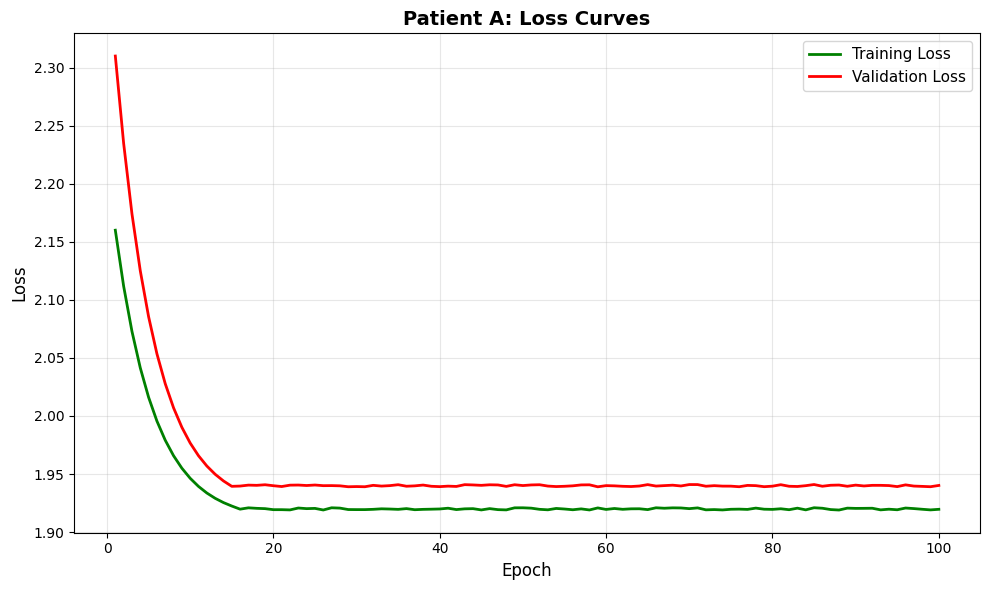

In [4]:
# TODO: Plot Patient A's training and validation losses
# HINT: Call plot_loss_curves() with the right datasets for Patient A, and an appropriate title

# Add your code here
plot_loss_curves(patient_a_train, patient_a_val, "Patient A: Loss Curves")

#### TODO: Diagnose Patient A

**Question**: Looking at Patient A's loss curves, what is the diagnosis? What's causing this model to fail, and what would you recommend to fix it? (2-3 sentences)

_Write your answer here:_

Patient A shows classic underfitting (high bias). Both training and validation losses remain stuck at high values (~1.90-1.95) with minimal improvement over 100 epochs, indicating the model lacks the capacity to learn the underlying patterns in the forest data. The fix is to increase model capacity by adding more layers, more neurons per layer, or training longer, giving the model the ability to capture more complex relationships between the 54 features and 7 forest types.

> **Diagnostic hints**: 
> - Look at the y-axis values. Are the losses high or low?
> - How much do the curves move over 100 epochs?
> - Do the curves stay close together or diverge?
> - What does it tell you when BOTH training and validation losses barely improve?
> 
> Think back to the bias-variance tradeoff from the conceptual module.

### 3.2: Patient B - "The Memorizer Model"

Agency B's model achieved perfect accuracy on training data but completely failed on new forest regions. The curves will tell you exactly when things went wrong.

> <details>
> <summary><b>How is Patient B's data generated?</b></summary>
> 
> This synthetic data follows two distinct trajectory patterns:
> 
> **Training loss trajectory:**
> - Smooth monotonic decrease from 1.850 to 0.013
> - Rapid initial drop (epochs 1-20): 1.85 → 0.17
> - Gradual asymptotic approach to near-zero (epochs 20-100): 0.17 → 0.013
> - Each step gets smaller as loss approaches zero
> 
> **Validation loss trajectory:**
> - Initial descent phase (epochs 1-26): 1.860 → 0.296
> - Critical turning point at epoch 26 (validation minimum: 0.296)
> - Reversal phase (epochs 27-100): 0.296 → 2.997
> - Acceleration in later epochs—the increase speeds up over time
> 
> The key feature: training loss continues its smooth decline throughout all 100 epochs, while validation loss reverses direction early in the training and climbs dramatically again.
> </details>

In [5]:
# Access data
patient_b_train = np.array([
    1.850, 1.620, 1.420, 1.250, 1.100, 0.970, 0.850, 0.740, 0.650, 0.570,
    0.500, 0.440, 0.390, 0.345, 0.305, 0.270, 0.240, 0.215, 0.192, 0.172,
    0.155, 0.140, 0.127, 0.116, 0.106, 0.097, 0.089, 0.082, 0.076, 0.071,
    0.066, 0.062, 0.058, 0.055, 0.052, 0.049, 0.047, 0.045, 0.043, 0.041,
    0.039, 0.038, 0.036, 0.035, 0.034, 0.033, 0.032, 0.031, 0.030, 0.029,
    0.028, 0.027, 0.027, 0.026, 0.025, 0.025, 0.024, 0.024, 0.023, 0.023,
    0.022, 0.022, 0.021, 0.021, 0.021, 0.020, 0.020, 0.020, 0.019, 0.019,
    0.019, 0.018, 0.018, 0.018, 0.018, 0.017, 0.017, 0.017, 0.017, 0.017,
    0.016, 0.016, 0.016, 0.016, 0.016, 0.015, 0.015, 0.015, 0.015, 0.015,
    0.015, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.014, 0.013, 0.013
])

patient_b_val = np.array([
    1.860, 1.640, 1.450, 1.290, 1.150, 1.030, 0.920, 0.825, 0.740, 0.665,
    0.600, 0.545, 0.500, 0.462, 0.430, 0.403, 0.380, 0.361, 0.345, 0.332,
    0.321, 0.313, 0.306, 0.301, 0.298, 0.296, 0.296, 0.297, 0.299, 0.302,
    0.306, 0.311, 0.317, 0.324, 0.332, 0.341, 0.351, 0.362, 0.374, 0.387,
    0.401, 0.416, 0.432, 0.449, 0.467, 0.486, 0.506, 0.527, 0.549, 0.572,
    0.596, 0.621, 0.647, 0.674, 0.702, 0.731, 0.761, 0.792, 0.824, 0.857,
    0.891, 0.926, 0.962, 0.999, 1.037, 1.076, 1.116, 1.157, 1.199, 1.242,
    1.286, 1.331, 1.377, 1.424, 1.472, 1.521, 1.571, 1.622, 1.674, 1.727,
    1.781, 1.836, 1.892, 1.949, 2.007, 2.066, 2.126, 2.187, 2.249, 2.312,
    2.376, 2.441, 2.507, 2.574, 2.642, 2.711, 2.781, 2.852, 2.924, 2.997
])

print("✓ Patient B data loaded")
print(f"  Epochs: {len(patient_b_train)}")
print(f"  Train loss: {patient_b_train[0]:.4f} → {patient_b_train[-1]:.4f} (change: {patient_b_train[0] - patient_b_train[-1]:.4f})")
print(f"  Val loss:   {patient_b_val[0]:.4f} → {patient_b_val[-1]:.4f} (change: {patient_b_val[0] - patient_b_val[-1]:.4f})")
print(f"  Best val loss: {patient_b_val.min():.4f} at epoch {patient_b_val.argmin() + 1}")

✓ Patient B data loaded
  Epochs: 100
  Train loss: 1.8500 → 0.0130 (change: 1.8370)
  Val loss:   1.8600 → 2.9970 (change: -1.1370)
  Best val loss: 0.2960 at epoch 26


> **Reading the raw numbers**: Training loss drops dramatically (1.85 → 0.013), suggesting the model is learning *something*. But validation loss tells a different story: it improves initially, reaches 0.296 at epoch 26, then reverses course and climbs to 2.997—worse than where it started. 
> 
> Notice the gap: by epoch 100, training is near-perfect (0.013) while validation has deteriorated to 2.997. What happens at epoch 26, and will the two curves tell opposite stories after that point? The plot will reveal the critical moment.

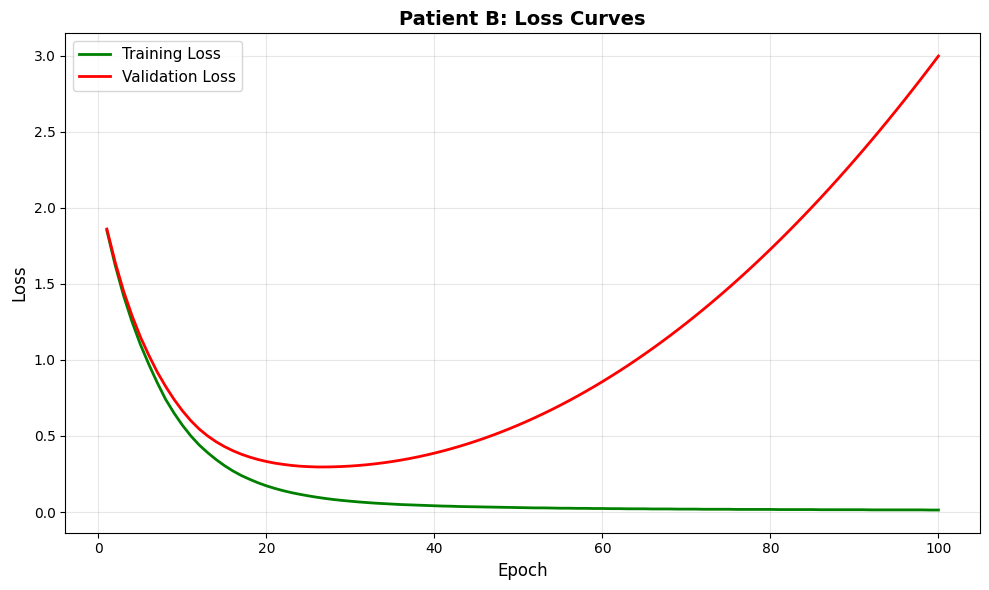

In [6]:
# TODO: Plot Patient B's training and validation losses
# HINT: Call plot_loss_curves() with the right datasets for Patient B, and an appropriate title

# Add your code here
plot_loss_curves(patient_b_train, patient_b_val, "Patient B: Loss Curves")

#### TODO: Diagnose Patient B

**Question**: What's happening with Patient B's model? Why does it work perfectly on training data but fail on new data? At which epoch should training have stopped, and what does that tell us? (2-3 sentences)

_Write your answer here:_

Patient B shows severe overfitting (high variance). Training loss drops to nearly zero while validation loss reaches its minimum around epoch 26 (0.296), then dramatically increases to nearly 3.0 by epoch 100. This divergence indicates the model memorized training-specific patterns (like exact GPS coordinates) rather than learning generalizable vegetation features. Training should have stopped at epoch 26 using early stopping, before the model began trading generalization for memorization.

> **Diagnostic hints for Patient B**:
> - Compare where the training curve ends vs where the validation curve ends
> - When does validation loss stop improving? What happens after that point?
> - What does it mean when training loss approaches zero but validation loss increases?
> - This is the classic signature of which problem: underfitting or overfitting?
> 
> The gap between the curves tells a story about memorization vs. generalization.

### 3.3: Patient C - "The Chaotic Model"

Agency C's training logs show wild swings in loss values. Some epochs looked promising, then suddenly loss would spike to extreme values. This is a completely different type of problem.

> <details>
> <summary><b>How is Patient C's data generated?</b></summary>
> 
> This synthetic data simulates unstable training dynamics through three components:
> 
> **1. Initial drop (epochs 1-20):**
> - Exponential decay from 5.0 down to ~1.5
> - Formula: `5.0 - 3.5 * (1 - exp(-linspace(0, 4, 20)))` creates rapid early improvement
> - Both curves follow similar trajectories with slight variation
> 
> **2. Unstable oscillations (epochs 21-100):**
> - Base level slowly drifts from 1.5 to 1.2 (slight downward trend)
> - Random noise added at each epoch (σ = 0.15-0.18)
> - Random walk component creates unpredictable drift (cumulative sum of random values)
> - Validation oscillates more wildly than training (1.2x amplification factor)
> 
> **3. Dramatic spikes:**
> - Two sudden jumps added at epochs 35 and 68
> - Spike magnitudes: randomly between 0.8 and 1.5 points
> - Validation spikes are even larger (1.2x multiplier)
> 
> The combination produces a pattern where losses bounce erratically with no consistent improvement. Standard deviation (~0.60) measures this variability; compare it to Patient A's near-zero std or Patient B's smooth curves.
> </details>

In [7]:
# Access data

## 1. Initial drop
initial_drop = 5.0 - 3.5 * (1 - np.exp(-np.linspace(0, 4, 20)))

## 2. Unstable oscillations
base_level = np.linspace(1.5, 1.2, 80)  # Slight downward trend
noise = np.random.normal(0, 0.15, 80)  # Random noise
oscillations = 0.3 * np.random.randn(80).cumsum() / 10  # Random walk component

patient_c_train = np.concatenate([
    initial_drop,
    base_level + oscillations + noise
])
patient_c_val = np.concatenate([
    initial_drop + np.random.normal(0, 0.05, 20),  # Similar initial drop
    base_level + 0.1 + oscillations * 1.2 + np.random.normal(0, 0.18, 80)
])

# 3. Add spikes
for idx in [35, 68]:
    spike = np.random.uniform(0.8, 1.5)
    patient_c_train[idx] += spike
    patient_c_val[idx] += spike * 1.2

# 4. Keep losses in reasonable range (0.3 to 5.5)
patient_c_train = np.clip(patient_c_train, 0.3, 5.5)
patient_c_val = np.clip(patient_c_val, 0.3, 5.5)

print("✓ Patient C data loaded")
print(f"  Epochs: {len(patient_c_train)}")
print(f"  Train loss: range [{patient_c_train.min():.3f}, {patient_c_train.max():.3f}]")
print(f"  Val loss:   range [{patient_c_val.min():.3f}, {patient_c_val.max():.3f}]")
print(f"  Train loss std: {patient_c_train.std():.3f}")
print(f"  Val loss std:   {patient_c_val.std():.3f}")

✓ Patient C data loaded
  Epochs: 100
  Train loss: range [0.963, 5.000]
  Val loss:   range [0.924, 4.990]
  Train loss std: 0.642
  Val loss std:   0.624


> **Reading the raw numbers**: Unlike the previous patients, there's no clear trajectory here. Losses range from 1.0 to 5.0 with a standard deviation of ~0.60, indicating wild swings rather than steady progress. The initial drop from 5.0 to ~1.5 shows the model *can* improve initially, but then chaos takes over.
> 
> Compare the standard deviations (0.60) to typical training runs where std would be much lower as losses smoothly converge. High variability suggests the training process itself is unstable. The plot will show whether there's any learning signal hidden in the noise, or just pure chaos.

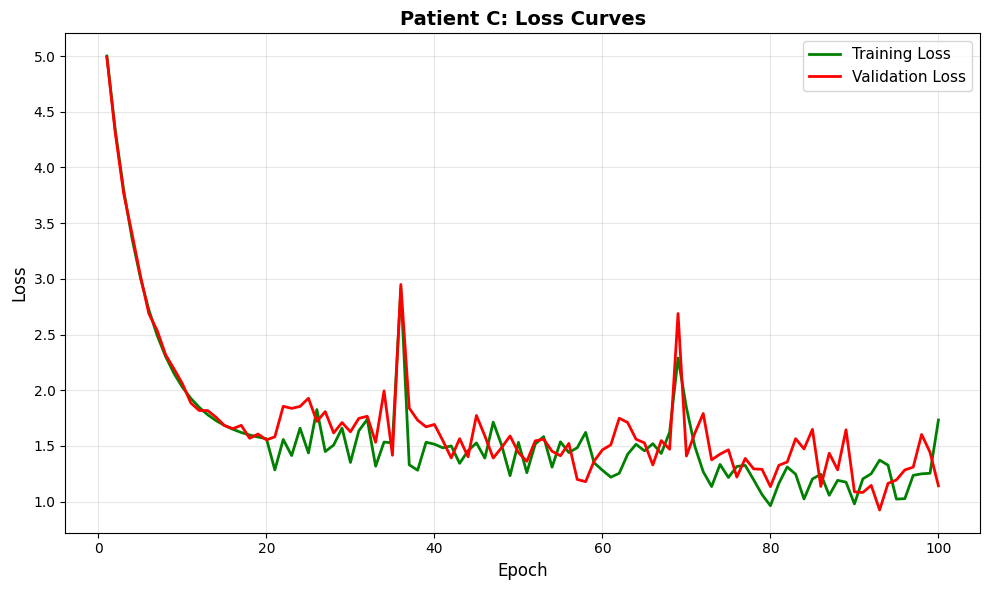

In [8]:
# TODO: Plot Patient C's training and validation losses
# HINT: Call plot_loss_curves() with the right datasets for Patient C, and an appropriate title

# Add your code here
plot_loss_curves(patient_c_train, patient_c_val, "Patient C: Loss Curves")

#### TODO: Diagnose Patient C

**Question**: Patient C's curves look completely different from A and B. What's causing this chaotic behavior? This isn't about bias or variance: what training parameter is likely wrong, and how would you fix it? (2-3 sentences)

_Write your answer here:_

Patient C shows training instability caused by optimization problems, not model capacity issues. The wild oscillations, random spikes, and erratic behavior indicate the learning rate is too high, causing parameter updates that overshoot optimal values and destabilize training. The fix is to reduce the learning rate by 10x (e.g., from 0.01 to 0.001), increase batch size for more stable gradients, or add gradient clipping to prevent extreme updates. This must be fixed before addressing any bias/variance concerns.

> **Diagnostic hints for Patient C**:
> - Is there a clear, consistent downward trend, or is any progress obscured by chaos?
> - What causes loss to oscillate wildly or spike randomly during training?
> - This pattern indicates instability in the training process itself, not the model architecture
> - Think about what controls the size of parameter updates during training
> 
> When you see erratic curves dominated by noise and spikes, even if there's a slight underlying trend, the problem is usually in the optimization settings, and not the model capacity. You can't diagnose bias/variance until training is stable.

## Step 4: Create your diagnostic cheat sheet

Now that you've diagnosed three different failure modes, let's consolidate your knowledge into a reusable reference guide. This table can be your go-to resource whenever you encounter training problems.

### TODO: Complete the diagnostic reference table

Fill in the missing cells in this diagnostic cheat sheet based on what you learned from the three patients.

| **Symptom** | **Diagnosis** | **Fix** |
|------------|--------------|--------|
| Both losses high and flat | Underfitting (high bias) | Add capacity: more layers, more neurons, or train longer |
| Train ↓ Val ↑ (curves diverge) | Overfitting (high variance) | Add regularization (dropout, weight decay), use early stopping, or reduce model complexity |
| Oscillating/spiking losses | Training instability | Reduce learning rate, increase batch size, or add gradient clipping |
| Both losses decreasing together | Healthy training | Keep training! Monitor for plateau or divergence |

_Fill in your answers in the markdown cell above_

> **Your diagnostic toolkit**: This table is your decision tree for troubleshooting. When you train any model in the future:
> 1. Plot training and validation loss
> 2. Match the pattern to one of these four signatures
> 3. Apply the corresponding fix
> 
> With practice, this pattern recognition becomes automatic. You'll glance at curves and immediately know: "That's overfitting: stop at epoch 25" or "That's instability: cut the learning rate by 10x". As you encounter more training runs, you'll expand this toolkit with additional patterns, each one making your diagnostic skills sharper.

### (Optional) TODO: Expanding your diagnostic toolkit

You've now built a cheat sheet covering the four most common loss curve patterns. But real-world training runs can produce many other signatures.

**Question**: Based on what you've learned about reading loss curves, what other training problems do you think might reveal themselves through characteristic patterns? Think about:
- What if one curve behaves normally but the other does something unexpected?
- What if both curves show unusual behavior you haven't seen yet?
- What might different rates of change (fast vs. slow descent) indicate?

Brainstorm 2-3 other patterns you might encounter and what they could signal. There are no wrong answers; this is about building your intuition for pattern recognition.

> *HINT*: Start by reviewing the patterns you've diagnosed (flat, diverging, erratic). Then imagine variations or combinations. For real-world training issues and their signatures, see [Diagnosing Model Performance with Learning Curves - Better Deep Learning](https://rstudio-conf-2020.github.io/dl-keras-tf/notebooks/learning-curve-diagnostics.nb.html).


_Write your ideas here:_

**Pattern 1: Validation improving while training stalls**
If training loss stops decreasing but validation loss keeps improving, this might indicate data shuffling issues (training set not properly randomized each epoch) or the model has hit a local minimum on the training set but still has room to generalize better. Could also suggest the training data has some bias or anomaly that validation doesn't have.

**Pattern 2: Both losses increasing together**
If both curves start rising from the beginning or after initially descending, the learning rate is likely way too high—the model is diverging rather than converging. Each update overshoots so dramatically that it makes predictions worse. This is different from Patient C's oscillations; here the trend is consistently upward, not chaotic.

**Pattern 3: Sudden loss spike mid-training**
If curves are descending smoothly then suddenly jump up at a specific epoch, this could indicate: (a) learning rate was increased or changed at that point (learning rate scheduling gone wrong), (b) corrupted batch of data was encountered, or (c) numerical instability (gradients became NaN). Unlike Patient C's random spikes, this would be a one-time event at a specific, identifiable epoch.

**Pattern 4: Validation loss has periodic spikes**
If validation loss shows regular spikes every N epochs while training is smooth, this might indicate the validation set contains certain difficult batches that appear cyclically, or there's an issue with how validation data is sampled/loaded. The periodicity would distinguish this from random noise.

## Conclusion

Congratulations! You've successfully diagnosed three real training failures using only their loss curves. You've learned to recognize the signature patterns and connect them to root causes, building the systematic workflow that experts use for troubleshooting.

**What you've accomplished:**

- [x] **Built a reusable diagnostic tool** - created a plotting function to visualize loss curves consistently
- [x] **Diagnosed three training failures** - recognized distinct patterns in the curves, identified what went wrong, and prescribed fixes for each case
- [x] **Created a diagnostic reference** - built a reusable cheat sheet for future troubleshooting
- [x] **Expanded your pattern library** - brainstormed other potential loss curve signatures beyond the core four

**Critical insights:**

- **Loss curves reveal everything** - you can diagnose most problems before ever looking at predictions
- **Patterns repeat across domains** - whether it's forest classification or any other task, these signatures stay the same
- **Different problems need different solutions** - each signature requires a specific intervention
- **Always plot both curves** - training loss alone is dangerously misleading

Pattern recognition makes you efficient. When you've seen these signatures a few times, diagnosis becomes instant. You glance at the plot and immediately know: "That's overfitting: stop at epoch 25", or "That's underfitting: add more layers". This intuition transforms training from frustrating trial-and-error into systematic problem-solving.

> **Next steps to explore**: As you train more models, watch for composite problems (underfitting + instability), implement automatic early stopping in your training loops, and build your library of rarer patterns like sudden spikes or periodic oscillations.